# Deep Autoencoder on MNIST Dataset

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten, Lambda
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras import backend as K
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))
K.get_session().run(tf.global_variables_initializer())

from tensorflow import set_random_seed
set_random_seed(2)

import sys
sys.path.append('../util/')
from util import plotProgress

Using TensorFlow backend.


## Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


## t-distributed Stochastic Neighbor Embedding
### Visualize high dimensional data with t-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.216s...
[t-SNE] Computed neighbors for 5000 samples in 37.188s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.116266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.983177
[t-SNE] Error after 500 iterations: 1.711592


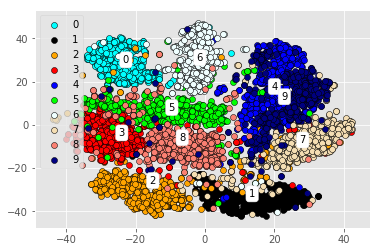

In [3]:
from sklearn.manifold import TSNE

X_tsne=X_test[:5000].reshape(5000,-1)
tsne=TSNE(n_components=2,verbose=1,n_iter=500).fit_transform(X_tsne)
cmap=['cyan','black','orange','red','blue','lime','azure','wheat','salmon','navy']
fig,ax=plt.subplots()
for i in range(10):
    ax.scatter(tsne[y_test[:5000]==i,0],tsne[y_test[:5000]==i,1],
                edgecolors='black',c=cmap[i],
                label=str(i))
    ax.annotate(str(i),(tsne[y_test[:5000]==i,0].mean(),tsne[y_test[:5000]==i,1].mean()),
               bbox=dict(boxstyle="round", fc="w"))
plt.legend()

## Declare Parameters

In [4]:
epochs = 100
batch = 256
latent_dim = 2
inters = []
optimizer = 'adam'

## Build Encoder

In [5]:
inputs=Input(shape = (X_train.shape[1],))
x = inputs
for inter in inters:
    x = Dense(inter,activation='relu')(x)
x = Dense(latent_dim)(x)
encoder = Model(inputs,x,name='encoder')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1570      
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


## Build Decoder

In [6]:
decode_in = Input(shape = (latent_dim,))
decode = decode_in
for inter in inters[::-1]:
    decode = Dense(inter,activation = 'relu')(decode)
decode = Dense(X_train.shape[1],activation = 'sigmoid')(decode)
decoder = Model(decode_in,decode)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               2352      
Total params: 2,352
Trainable params: 2,352
Non-trainable params: 0
_________________________________________________________________


## Train Autoencoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.1100 - val_loss: 0.0716
Epoch 2/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0693 - val_loss: 0.0664
Epoch 3/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0642 - val_loss: 0.0626
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0621 - val_loss: 0.0614
Epoch 5/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.0611 - val_loss: 0.0606
Epoch 6/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0604 - val_loss: 0.0600
Epoch 7/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0598 - val_loss: 0.0595
Epoch 8/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0594 - val_loss: 0.0591
Epoch 9/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0590 - val_loss: 0.0

60000/60000 [==============================] - 1s 14us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 78/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 79/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 80/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 81/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 82/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 83/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 84/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 85/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0555 - val_loss: 0.0553
Epoch 86/100
60000/60000 [========================

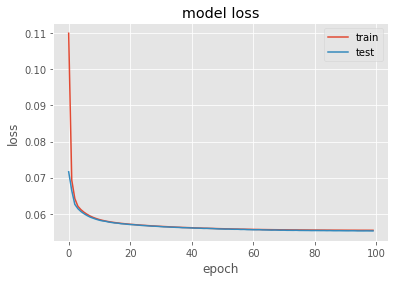

In [7]:
autoencoder = Model(inputs,decoder(encoder(inputs)))
autoencoder.compile(optimizer = optimizer,loss = 'mse')

es_cb = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1, mode = 'auto')
history = autoencoder.fit(X_train,X_train,
                        epochs = epochs,
                        batch_size = batch,
                        validation_data = (X_test,X_test),
                        callbacks = [es_cb])
# plot historical training process
plotProgress(history)

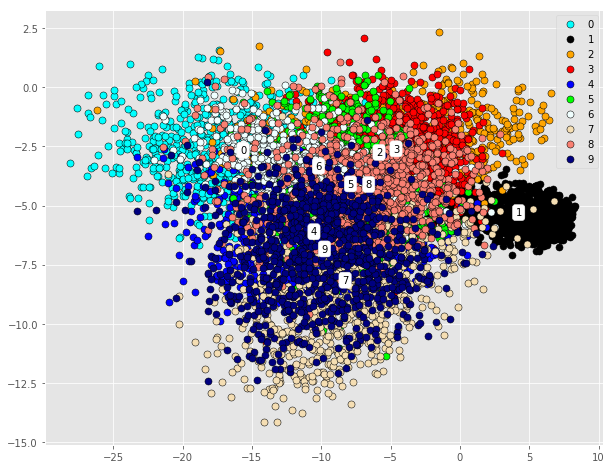

In [8]:
# get latent variables
lat = encoder.predict(X_test)
# # plot scatter
cmap = ['cyan','black','orange','red','blue','lime','azure','wheat','salmon','navy']
fig,ax=plt.subplots(figsize = (10,8))
for i in range(10):
    ax.scatter(lat[y_test == i,0],lat[y_test == i,1],
               edgecolors = 'black',
               c = cmap[i],
               label = str(i),
               s = 50)
    ax.annotate(str(i),(lat[y_test == i,0].mean(),lat[y_test == i,1].mean()),
               bbox = dict(boxstyle = "round", fc = "w"))
plt.legend()
fig.savefig('images/clusters_None.png',bbox_inches='tight')

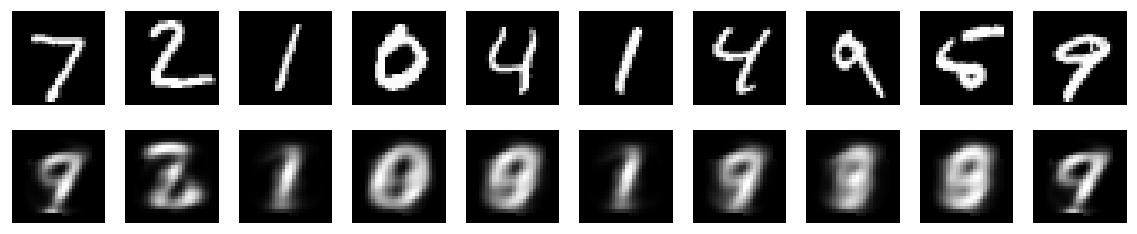

In [9]:
# get decoded digits
reconstructed = decoder.predict(lat)
# plot decoded
n = 10
row = 0
fig = plt.figure(figsize = (20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i + row * n].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i + row * n].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
fig.savefig('images/digits_None.png',bbox_inches='tight')